# Support Vector Machine

## Necessary Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


## Load Data Files

In [2]:
col=['sepal_length','sepal_width','petal_length','petal_width','species']
data=pd.read_csv("iris.data",names=col)
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


## Convert Labels Aplaphet to Numeric Values

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label =le.fit_transform(data['species'])


In [4]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
data['species'] = label
data


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
data.shape

(150, 5)

In [9]:
data['species'].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

## Data Splitting. Splittiing ratio  as 75% Train and 25% Test Data.


In [10]:
x = data[['sepal_length','sepal_width','petal_length','petal_width']]
y = data['species']

In [11]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [14]:
len(x_train)

112

In [15]:
len(y_train)

112

In [16]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
78,6.0,2.9,4.5,1.5
84,5.4,3.0,4.5,1.5
80,5.5,2.4,3.8,1.1
3,4.6,3.1,1.5,0.2
116,6.5,3.0,5.5,1.8
...,...,...,...,...
136,6.3,3.4,5.6,2.4
27,5.2,3.5,1.5,0.2
16,5.4,3.9,1.3,0.4
58,6.6,2.9,4.6,1.3


In [17]:
y_train

78     1
84     1
80     1
3      0
116    2
      ..
136    2
27     0
16     0
58     1
124    2
Name: species, Length: 112, dtype: int32

In [18]:
len(x_test)

38

In [19]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [20]:
clf.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
clf.predict(x_test)

array([-0.03565552,  1.81235076,  1.2017836 ,  1.93581468,  1.19711821,
        1.38579887, -0.02952075,  1.76302197,  1.70679709,  1.38719727,
        0.00796227,  1.07499707,  1.41123466, -0.08548467,  1.94143831,
       -0.11390871,  2.09427758,  1.19899612, -0.01668819,  2.25616501,
       -0.09142877, -0.08073509, -0.08548467,  1.34398868,  1.83640589,
        2.16617119,  0.00701097,  1.59366462, -0.02452796, -0.03765313,
        1.32933076,  1.98524611,  0.05520542,  1.52586507,  1.16842625,
        1.18868312, -0.05202538,  1.95584607])

In [22]:
clf.score(x_test,y_test)

0.9345895614787268

## SVM Modelling

In [23]:
from sklearn import svm
classifier = svm.SVC(kernel = 'linear', gamma='auto', C=2)
classifier.fit(x_train,y_train)
y_predict = classifier.predict(x_test)

In [24]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.92      0.96        12
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



## Accuracy

In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.9736842105263158


## Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[14,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 12]], dtype=int64)

## Evalution Result

In [27]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.92      0.96        12
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



## Splitting Ratio as 80% Train and 20% Test Data.


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [29]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [30]:
clf.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
clf.predict(x_test)

array([ 0.08101413,  1.66456069,  1.99856715,  1.28482197,  0.00508448,
        1.28055387,  2.04948879,  2.03742436,  1.78957905,  0.05261555,
       -0.03372384,  2.04151515, -0.03027608,  1.7499753 , -0.02192548,
       -0.00641072,  0.18990055, -0.04923031,  1.80032515,  1.18411141,
        0.04734057,  1.58642686,  1.59851878,  1.01287938,  0.06979239,
        0.94814656,  1.1194035 ,  0.15538524,  1.40287451,  1.34300298])

In [32]:
clf.score(x_test,y_test)

0.9465185184638215

In [33]:
from sklearn import svm
classifier = svm.SVC(kernel = 'linear', gamma='auto', C=2)
classifier.fit(x_train,y_train)
y_predict = classifier.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

1.0


In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 10]], dtype=int64)

In [36]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 2D Scatter Plot

C:\Users\me\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


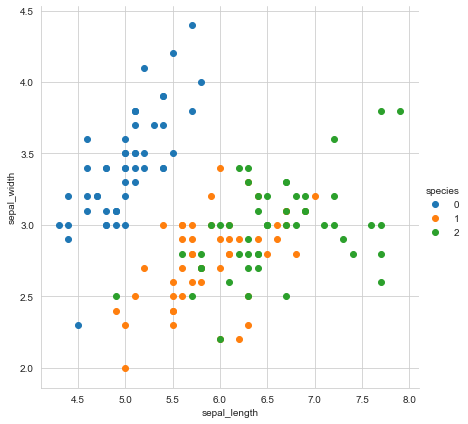

In [37]:
sns.set_style('whitegrid');
sns.FacetGrid(data,hue='species',size=6)\
    .map(plt.scatter,'sepal_length', 'sepal_width')\
    .add_legend();
plt.show()

## Pair-Plot

C:\Users\me\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


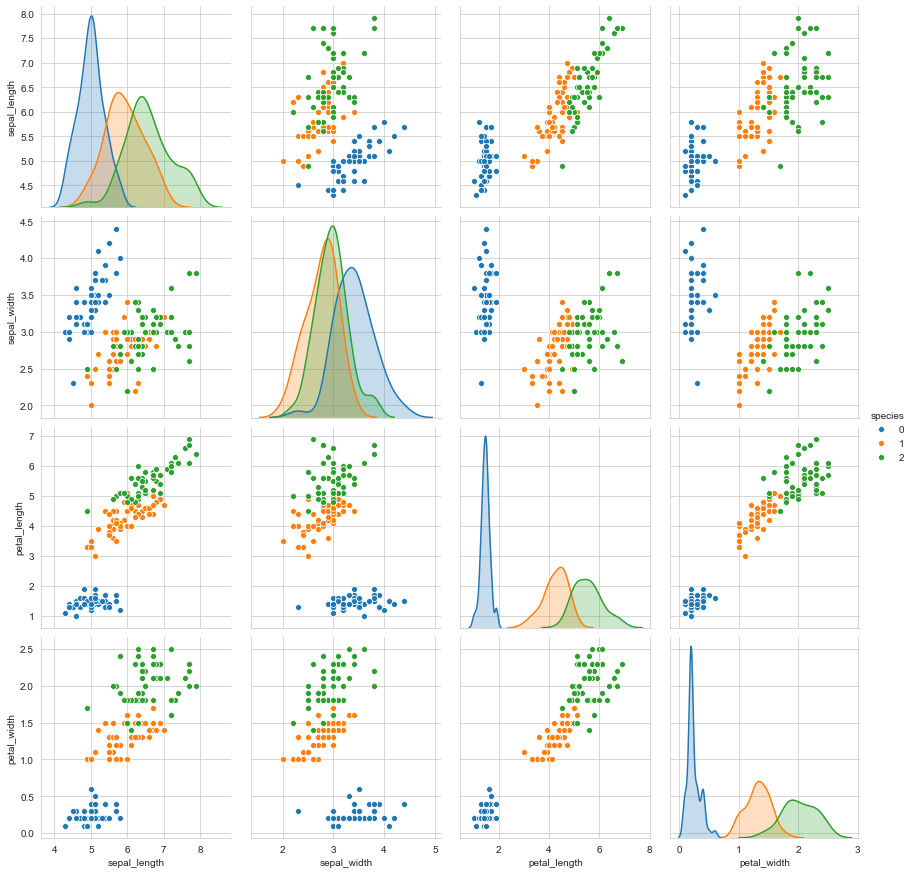

In [38]:
sns.set_style('whitegrid');
sns.pairplot(data,hue='species',size=3)
plt.show()

# Principal Component Analysis and Linear Discriminant Analysis

## Normalize the dataset using MinMax Scaler

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
x2_data = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [41]:
scaler = MinMaxScaler()
scaler.fit(x2_data)
data1 = scaler.transform(x2_data)

In [42]:
data1

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

## Mean and Covariance Matrix

In [43]:
mean1 = np.mean(data1 , axis=0)
mean2=np.asmatrix(mean1)
mean=np.transpose(mean2)
print('mean vector====>',mean)

mean vector====> [[0.4287037 ]
 [0.43916667]
 [0.46757062]
 [0.45777778]]


In [44]:
X=np.transpose(x)
cov = np.cov(X)
print('Covariance matrix is==>\n',cov)

Covariance matrix is==>
 [[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


## Eigen Decomposition

In [45]:
eigenvalues, eigenvectors = np.linalg.eig(cov)
print('Eigen Values are===>',eigenvalues)
print('Eigen Vectors are===>',eigenvectors)

Eigen Values are===> [4.22484077 0.24224357 0.07852391 0.02368303]
Eigen Vectors are===> [[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]


In [46]:
eigenvalues[0]/sum(eigenvalues)

0.9246162071742681

## Sort the Eigen values in descending order

In [47]:
eigenvector = np.transpose(eigenvectors)
idxs = np.argsort(eigenvalues)[:: -1]
eigenvectors = eigenvectors[idxs]
        
eig_vect = eigenvectors[0: ]


In [48]:
eig_vect

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

## Project the Data onto Selected Vector

In [49]:
X_projected = data1.dot(eigenvectors.T[0])
X_projected

array([ 0.10195972,  0.09901076,  0.05754853,  0.07996859,  0.08848769,
        0.19183889,  0.07011863,  0.1098616 ,  0.05221784,  0.09514923,
        0.13975462,  0.10429146,  0.07401477, -0.01976053,  0.12609313,
        0.17579567,  0.1337662 ,  0.11691155,  0.2104474 ,  0.12114611,
        0.17907458,  0.13952581, -0.00976162,  0.19722547,  0.14784597,
        0.13809126,  0.15428344,  0.12652205,  0.11543175,  0.10110304,
        0.11457507,  0.1799419 ,  0.091003  ,  0.11814126,  0.09514923,
        0.07316283,  0.12761818,  0.09514923,  0.0342718 ,  0.11990576,
        0.09234922,  0.08326288,  0.02741606,  0.18075923,  0.19417063,
        0.10391843,  0.12071245,  0.06202254,  0.12971047,  0.0987713 ,
        0.96160394,  0.88725449,  0.99897583,  0.72521338,  0.9255283 ,
        0.8007532 ,  0.91777063,  0.51503788,  0.90224092,  0.68180309,
        0.56782986,  0.80033492,  0.73400655,  0.88149014,  0.65661763,
        0.89134483,  0.81375696,  0.71129705,  0.90144487,  0.68

In [50]:
result = pd.DataFrame(X_projected, columns=['PC1'])
result['y-axis'] = 0.0
result['species'] = y

In [51]:
result.head

<bound method NDFrame.head of           PC1  y-axis  species
0    0.101960     0.0        0
1    0.099011     0.0        0
2    0.057549     0.0        0
3    0.079969     0.0        0
4    0.088488     0.0        0
..        ...     ...      ...
145  1.145485     0.0        2
146  1.033604     0.0        2
147  1.080541     0.0        2
148  1.110589     0.0        2
149  0.975854     0.0        2

[150 rows x 3 columns]>

Text(0.5, 1, 'PCA Result')

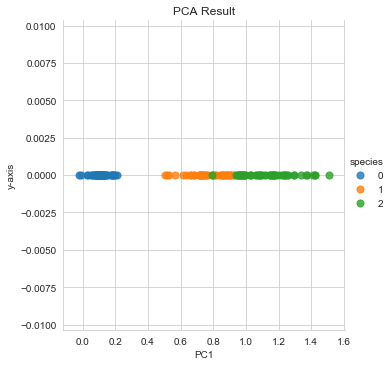

In [55]:
sns.lmplot('PC1','y-axis',data=result,fit_reg=False,scatter_kws={'s':50},hue='species')
plt.title('PCA Result')

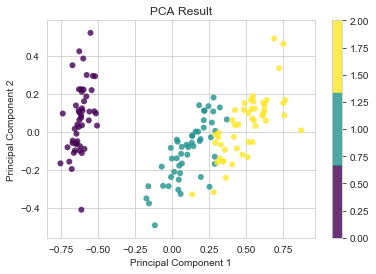

In [58]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]
plt.scatter(x1,x2, c=y, edgecolor = 'none',alpha = 0.8, cmap=plt.cm.get_cmap('viridis',3))
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()

## Visualization using Inbuilt PCA

Shape of X:  (150, 4)
Shape of transformed X:  (150, 2)


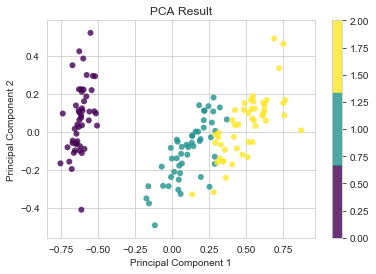

In [59]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

X = data1
pca = PCA(n_components = 2)
pca.fit(X)
X_projected = pca.transform(X)

print('Shape of X: ',X.shape)
print('Shape of transformed X: ',X_projected.shape)


x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1,x2, c=y, edgecolor = 'none',alpha = 0.8, cmap=plt.cm.get_cmap('viridis',3))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.colorbar()
plt.show()



